In [7]:
from functools import reduce
import pathlib
import pandas as pd 
import sys
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from adjustText import adjust_text # https://stackoverflow.com/questions/34693991/repel-annotations-in-matplotlib

# sys.path.append('/rumi/shams/abe/CanDI/')
sys.path.append('/data_gilbert2/backups/aarab/CanDI')

from CanDI import candi as can

In [8]:
from glob import glob
import bioinfokit
bioinfokit.__version__

'2.0.8'

In [9]:
from scripts.util import *

In [10]:
wd = '/data_gilbert/home/aarab/Projects/Decitabine-treatment'

In [11]:
sam_dependent_genes = [
    'METTL1', 'FTSJ1', 'PRMT5', 'SETD6', 'FBL', 'DPH5', 'KMT2A', 'EEF2KMT', 
    'METTL8', 'PRMT1', 'METTL16', 'COQ3', 'PRMT7', 'PEMT', 'MEN1', 'CARM1', 'SETD7', 'TFB2M', 
    'TRMT61A', 'SETMAR', 'TRMT61B', 'MRM3', 'TRMT10C', 'PRMT3', 'WDR5',
    'TFB1M', 'NSUN2', 'TARBP1', 'TRMT11', 'BUD23', 'DIMT1', 'METTL2A', 
    'TRMT6', 'RNMT', 'SUV39H1', 'TRMT1', 'FTSJ3', 'NOP2', 'ICMT', 'NSUN4', 
    'MRM2', 'EEF1AKMT3', 'EMG1', 'TRMT5', 'DNMT1', 'RRP8', 'SETDB2', 'THUMPD2', 'METTL5', 
    'PRDM16', 'EEF1AKMT1', 'SUV39H2', 'SETD9', 'CARNMT1', 'WDR4', 'COMTD1', 'ZCCHC4', 
    'PRMT6', 'EHMT2', 'MRM1', 
    'EEF1AKMT4'
]

In [12]:
all_sam_dependent_genes_df = pd.read_csv('RNA-seq/GOMF_SAM_DEPENDENT_METHYLTRANSFERASE_ACTIVITY.tsv',sep='\t',header=None).set_index(0)

all_sam_dependent_genes_df.loc['DESCRIPTION_BRIEF',1]

'Catalysis of the transfer of a methyl group from S-adenosyl-L-methionine to a substrate. [GOC:mah]'

In [13]:
all_sam_dependent_genes = all_sam_dependent_genes_df.loc['MAPPED_SYMBOLS',1].split(',')

# Our CRISPRi screens
DNMT1 inhibitor drugs 

In [14]:
scrns = load_data(screens=True,wd=wd)

In [15]:
scrns.keys()

dict_keys(['hl60_exp1_DAC_rho', 'hl60_exp1_DAC_gamma', 'hl60_exp2_DAC_rho', 'hl60_exp2_DAC_gamma', 'hl60_exp2_GSK_rho', 'hl60_exp2_GSK_gamma', 'molm13_exp_DAC_rho', 'molm13_exp_DAC_gamma', 'molm13_exp_GSK_rho', 'molm13_exp_GSK_gamma'])

In [52]:
res,sen = find_top(scrns['hl60_exp1_DAC_rho'].astype(float), 
         'rho score',0.2,
         'Mann-Whitney p-value',0.01)

up:  104
down: 119


In [62]:
'","'.join(sen.index.to_list())

'AMBRA1","APCS","API5","ARGLU1","ARHGAP30","ARID4A","ARIH1","ATF7IP","BCL2","BLM","BRMS1","C16orf82","C6orf57","CCAR1","CCDC125","CCDC22","CCDC53","CENPB","CHRM5","CHTOP","CIB4","CMTR2","COL4A5","COMMD1","COMMD2","COMMD4","CP","CSDE1","CSNK1A1","CSNK2A1","CTDSPL2","CTPS1","CXXC4","CYLD","DCP2","DDA1","DDX17","DEF6","DEFB125","DET1","DNAJA2","DYNLRB1","EIF3M","ERCC2","FAF2","FAM58A","FIBP","FZR1","GPATCH8","GPR162","GRB10","HNRNPM","ILF3","INO80E","INTS5","KDM1A","KIAA0195","KIAA0196","LHFPL5","LSM14A","MARK3","MED23","METTL9","MON2","MSN","MTF1","NANS","NOP58","NPRL3","PCBP1","PPP2R1A","PPP6C","PRKRIR","PTEN","PTPN7","PUM1","RAB5C","RABEP1","RALGAPB","RASA2","RASA3","RBBP4","RBM14","RBM14-RBM4","RBM5","REG3G","RFC1","RGS19","RHOA","RNF4","SAMD1","SAP130","SCAF1","SCAF8","SDHAF1","SERF2","SFPQ","SIN3A","SNRPB2","SOCS5","SQLE","SS18","SUPT20H","SYVN1","TAF6L","TBC1D22B","TBRG1","TCERG1","TFRC","TONSL","TOP1","TPTE2","TRIB1","TTC39C","USP22","YTHDC1","ZC3H12D","ZC3H18","ZMYM2'

In [32]:
df = scrns['hl60_exp1_DAC_rho'].astype(float)


,rho score,Mann-Whitney p-value
gene_name,,
AACS,-0.206845,0.178195
AARD,-0.231037,0.017208
ACTR8,-0.252510,0.104162
ADGB,-0.200293,0.396290
ADIPOQ,-0.207956,0.137479
...,...,...
ZC3H18,-0.531268,0.000218
ZCCHC5,-0.299699,0.071541
ZMYM2,-0.274859,0.000901


In [16]:
rho_df = merge_screen_data('hl60', ['exp1','exp2'], ['GSK','DAC'], 'rho', data=scrns)

> MAT1A, MAT2A, MAT2B 

In [17]:
set(sam_dependent_genes) ^ (set(sam_dependent_genes) & set(rho_df.index))

{'BUD23',
 'CARNMT1',
 'EEF1AKMT1',
 'EEF1AKMT3',
 'EEF1AKMT4',
 'EEF2KMT',
 'MRM2',
 'MRM3',
 'WDR5'}

In [347]:
rho_df_sam_dependent = rho_df.loc[set(rho_df.index) & set(sam_dependent_genes),]
# rho_df_sam_dependent[rho_df_sam_dependent["hl60_exp1_DAC_rho pvalue"] < 0.05]

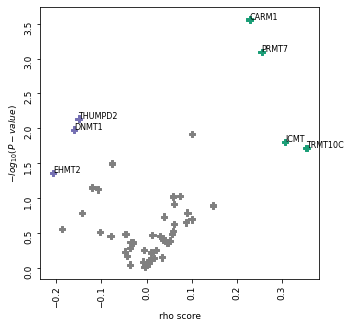

In [100]:
rho_df_sam_dependent = rho_df.loc[set(rho_df.index) & set(sam_dependent_genes),].reset_index()

bioinfokit.visuz.GeneExpression.volcano(
    rho_df_sam_dependent, 
    'hl60_exp1_DAC_rho score','hl60_exp1_DAC_rho pvalue', lfc_thr=(0.1,0.1),#pv_thr=(0.01,0.01),
    dotsize=40,
    geneid='gene_name',genenames='deg',show=True,axxlabel='rho score',markerdot='P',color= ('#1b9e77','grey','#7570b3') # ,'#e7298a','#66a61e','#e6ab02','#a6761d','#666666'
)

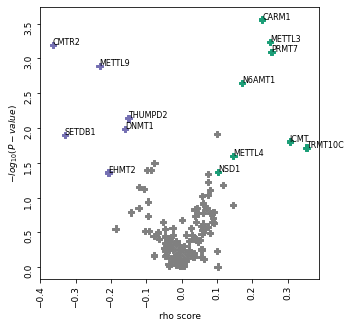

In [102]:
rho_df_sam_dependent = rho_df.loc[set(rho_df.index) & set(all_sam_dependent_genes),].reset_index()

bioinfokit.visuz.GeneExpression.volcano(
    rho_df_sam_dependent, 
    'hl60_exp1_DAC_rho score','hl60_exp1_DAC_rho pvalue', lfc_thr=(0.1,0.1),pv_thr=(0.05,0.05),
    dotsize=40,
    geneid='gene_name',genenames='deg',show=True,axxlabel='rho score',markerdot='P',color= ('#1b9e77','grey','#7570b3') # ,'#e7298a','#66a61e','#e6ab02','#a6761d','#666666'
)

In [20]:
# rho_df.loc[['MAT1A', 'MAT2A', 'MAT2B','DNMT3A','METTL14','METTL16'],] 

In [21]:
# import stringdb

# def run_enrichment(genes):
#     string_ids = stringdb.get_string_ids(genes)
#     enrichment_df = stringdb.get_enrichment(string_ids.queryItem).sort_values('number_of_genes',ascending=False)
    
#     df = enrichment_df[['inputGenes','p_value','fdr','description','term']]
    
#     return df

# Our RNA-seq data


In [22]:
comps = load_data(comparisons=True,wd=wd)

In [103]:
comps.keys()

dict_keys(['delta_mtyl', 'delta_te', 'delta_exp', 'delta_stbl'])

In [38]:
from bioinfokit import analys, visuz

In [105]:
# comps['delta_te'][comps['delta_te'].gene_name.isin(sam_dependent_genes)]

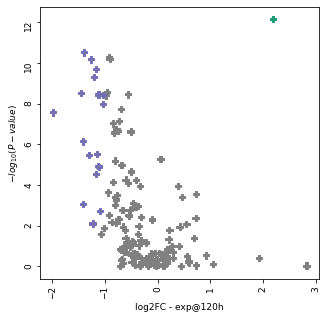

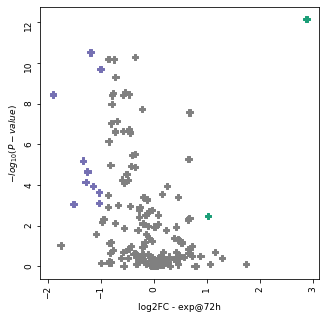

AssertionError: either significant or non-significant genes are missing; try to change lfc_thr or pv_thr to include both significant and non-significant genes

In [361]:
exp_df = comps['delta_exp']

exp_df_sam_dependent = exp_df[exp_df.gene_name.isin(all_sam_dependent_genes)].dropna()

for time in ['120h', '72h' , '6h']:
    bioinfokit.visuz.GeneExpression.volcano(
        exp_df_sam_dependent, 
        f'hl60_{time}_log2FC',f'hl60_{time}_pvalue', lfc_thr=(1,1),pv_thr=(0.01,0.01),
        # geneid='gene_name',genenames='deg',gstyle=1,gfont=7,
        dotsize=40,show=True,
        axxlabel=f'log2FC - exp@{time}',markerdot='P',color= ('#1b9e77','grey','#7570b3') # ,'#e7298a','#66a61e','#e6ab02','#a6761d','#666666'
    )

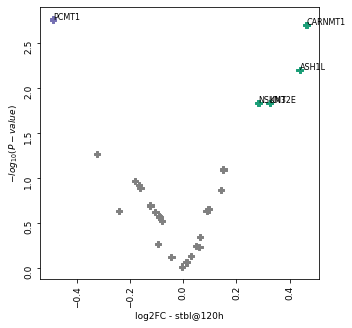

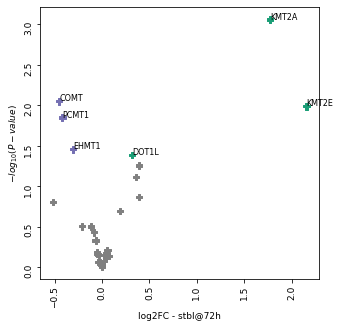

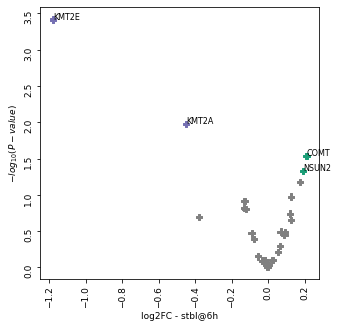

In [160]:
stbl_df = comps['delta_stbl']

stbl_df_sam_dependent = stbl_df[stbl_df.gene_name.isin(all_sam_dependent_genes)].dropna()

for time in ['120h', '72h' , '6h']:
    bioinfokit.visuz.GeneExpression.volcano(
        stbl_df_sam_dependent, 
        f'hl60_{time}_log2FC',f'hl60_{time}_pvalue', lfc_thr=(0.1,0.1),pv_thr=(0.05,0.05),
        geneid='gene_name',genenames='deg',gstyle=1,
        dotsize=40,show=True,
        axxlabel=f'log2FC - stbl@{time}',markerdot='P',color= ('#1b9e77','grey','#7570b3') # ,'#e7298a','#66a61e','#e6ab02','#a6761d','#666666'
    )

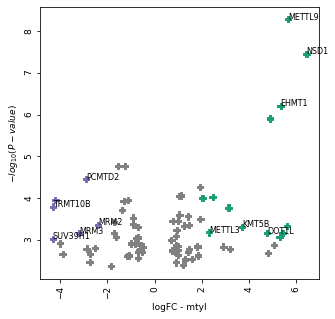

In [350]:
mtyl_df = comps['delta_mtyl']

mtyl_df_sam_dependent = mtyl_df[mtyl_df.gene_name.isin(all_sam_dependent_genes + ['MAT2A'])].dropna()

bioinfokit.visuz.GeneExpression.volcano(
    mtyl_df_sam_dependent, 
    'logFC','pval', lfc_thr=(2,2),pv_thr=(0.001,0.001),
    geneid='gene_name',genenames='deg',gstyle=1,
    dotsize=40,show=True,
    axxlabel=f'logFC - mtyl',markerdot='P',color= ('#1b9e77','grey','#7570b3') # ,'#e7298a','#66a61e','#e6ab02','#a6761d','#666666'
)

In [105]:
# comps['delta_te'][comps['delta_te'].gene_name.isin(sam_dependent_genes)]

## Splicing 

In [351]:
sam_dependent_id2name = mtyl_df_sam_dependent[['gene_id','gene_name']].drop_duplicates().set_index('gene_id')

In [352]:
isoform_psi = pd.concat([
    pd.read_csv(path,sep='\t').set_index('Event_id') 
    for path in glob('RNA-seq/suppa/diffSplice/isoform_hl60_*h_t_vs_u.dpsi.temp.0')
],axis=1).dropna().reset_index().rename(columns={'index':'Event_id'})
isoform_psi = pd.concat([
    isoform_psi, 
    isoform_psi.Event_id.str.split(';',expand=True).rename(columns={0:'gene_id',1:'transcript_id'})
],axis=1)


In [353]:
isoform_psi_df_sam_dependent = isoform_psi[isoform_psi.gene_id.isin(list(set(mtyl_df_sam_dependent.gene_id)))].reset_index(drop=True)

isoform_psi_df_sam_dependent = pd.concat([
    isoform_psi_df_sam_dependent,
    sam_dependent_id2name.loc[isoform_psi_df_sam_dependent.gene_id,].reset_index(drop=True)
],axis=1)

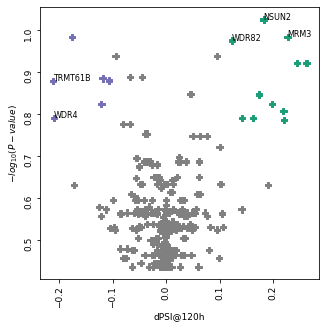

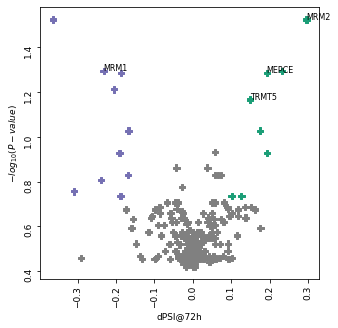

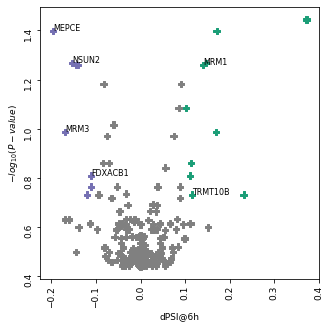

In [354]:
for time in ['120h', '72h' , '6h']:
    bioinfokit.visuz.GeneExpression.volcano(
        isoform_psi_df_sam_dependent, 
        f'isoform_hl60_{time}_t-isoform_hl60_{time}_u_dPSI',f'isoform_hl60_{time}_t-isoform_hl60_{time}_u_p-val',
        lfc_thr=(0.1,0.1),pv_thr=(0.2,0.2),
        geneid='gene_name',genenames='deg',gstyle=1,
        dotsize=40,show=True,
        axxlabel=f'dPSI@{time}',markerdot='P',color= ('#1b9e77','grey','#7570b3') # ,'#e7298a','#66a61e','#e6ab02','#a6761d','#666666'
    )

In [355]:
# isoform_psi_df_sam_dependent

#### events

In [30]:
def get_gene_id(suppa,gene_id):
    keep = suppa.index.str.split(';').str[0].str.split('.').str[0].isin([gene_id])
    return suppa[keep]


In [251]:
psi = pd.read_csv('RNA-seq/suppa/events.psi',sep='\t')

In [252]:
suppa_hl60_120h = pd.read_csv(
    'RNA-seq/suppa/diffSplice/hl60_120h_t_vs_u.dpsi.temp.0',sep='\t'
).set_index('Event_id')

suppa_hl60_72h = pd.read_csv(
    'RNA-seq/suppa/diffSplice/hl60_72h_t_vs_u.dpsi.temp.0',sep='\t'
).set_index('Event_id')

suppa_hl60_6h = pd.read_csv(
    'RNA-seq/suppa/diffSplice/hl60_6h_t_vs_u.dpsi.temp.0',sep='\t'
).set_index('Event_id')


In [356]:
suppa_hl60 = pd.concat([
    suppa_hl60_120h, suppa_hl60_72h,suppa_hl60_6h
],axis=1)
suppa_hl60['Event_type'] = suppa_hl60.index.str.split(';').str[1].str.split(':').str[0]

suppa_hl60['gene_id'] = suppa_hl60.index.str.split(';').str[0]
sam_dependent_psi_events = suppa_hl60[suppa_hl60.gene_id.isin(sam_dependent_id2name.index)].dropna().reset_index()

sam_dependent_psi_events = pd.concat([
    sam_dependent_psi_events, 
    sam_dependent_id2name.loc[sam_dependent_psi_events.gene_id,].reset_index(drop=True)
],axis=1).dropna()

#### RI

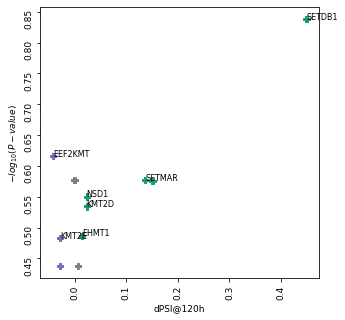

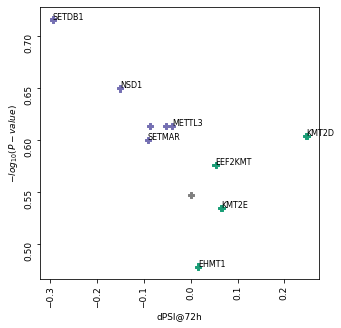

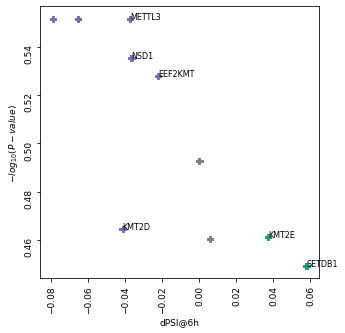

In [357]:
for time in ['120h', '72h' , '6h']:
    bioinfokit.visuz.GeneExpression.volcano(
        sam_dependent_psi_events[sam_dependent_psi_events.Event_type=='RI'], 
        f'events_hl60_{time}_t-events_hl60_{time}_u_dPSI',f'events_hl60_{time}_t-events_hl60_{time}_u_p-val',
        lfc_thr=(0.01,0.01),pv_thr=(1,1),
        geneid='gene_name',genenames='deg',gstyle=1,
        dotsize=40,show=True,
        axxlabel=f'dPSI@{time}',markerdot='P',color= ('#1b9e77','grey','#7570b3') # ,'#e7298a','#66a61e','#e6ab02','#a6761d','#666666'
    )

# Our meRIP-seq data

In [ ]:
hl60_RNAme_df = pd.read_csv('meRIP-seq/radar/result.sig.txt',sep='\t')

In [ ]:
hl60_RNAme_df[hl60_RNAme_df.name.isin(['MAT1A', 'MAT2A', 'MAT2B','METTL14'])]

,chr,start,end,name,score,strand,thickStart,thickEnd,itemRgb,blockCount,blockSizes,blockStarts,logFC,p_value,ensembl
1954,chr4,118710493,118710542,METTL14,0,+,118710493,118710542,0,1,49,0,5.068904,0.001316,ENSG00000145388.15


In [14]:
# genes1 = genes.copy()
# genes2 = genes.copy()

# genes1['hyper_m6A'] = set(m6A_hl60_df[
#     (m6A_hl60_df.logFC > 2) & (m6A_hl60_df.p_value < 0.001)
# ].name.tolist())

# genes2['hypo_m6A']  = set(m6A_hl60_df[
#     (m6A_hl60_df.logFC < -2) & (m6A_hl60_df.p_value < 0.001)
# ].name.tolist())

In [15]:
# from venn import venn 
# fontsize=8

# # Set up the plot
# f, (ax1,ax2) = plt.subplots(1,2,figsize=(8,5))

# venn(genes1,fontsize=fontsize,legend_loc="lower left",ax=ax1)
# ax1.set_title('\n\nDecitabine', size = 15)

# # Set up the plot
# venn(genes2,fontsize=fontsize,legend_loc="lower right",ax=ax2)
# ax2.set_title('\n\nDMSO', size = 15)

# f.suptitle("HL60 DNA & RNA methylation genes",fontsize = 25)
# plt.tight_layout()
# f.subplots_adjust(wspace=0, hspace=0)
# plt.show()

In [16]:
# reduce(set.intersection, (set(val) for val in genes1.values()))

In [17]:
# reduce(set.intersection, (set(val) for val in genes2.values()))

# DAC vs. DMSO DNA methylation data
> **Extended representation bisulfite sequencing of gene regulatory elements in multiplexed samples and single cells**
> - https://www.nature.com/articles/s41587-021-00910-x

Data: [GSE149954](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE149954)
- [HL60 Bisulfite-Seq - 10ng dmso](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSM4518676)
- [HL60 Bisulfite-Seq - 10ng decitabine](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSM4518677)

In [6]:
hl60_DNAme_df = pd.read_csv('DNA-RNA-mtyl/Shareef-et-al-2021-Supp-Table2.csv')
hl60_DNAme_df['score'] = 0

In [11]:
hl60_DNAme_df#.loc[~hl60_DNAme_df["HL-60-specific hypermethylation"].isna(),:]

,Gene,ID,Chromosome,Start,End,Strand,K562 average methylation,Kasumi-1 average methylation,OCI-AML3 average methylation,HL-60 average methylation,K562-specific hypermethylation,Kasumi-1-specific hypermethylation,OCI-AML3-specific hypermethylation,HL-60-specific hypermethylation,K562-specific hypomethylation,Kasumi-1-specific hypomethylation,OCI-AML3-specific hypomethylation,HL-60-specific hypomethylation,score
0,A3GALT2,NM_001080438.1,chr1,"33,320,098","33,322,097",-,0.059,0.770,0.625,0.479,NaN,NaN,NaN,NaN,X,NaN,NaN,NaN,0
1,AADACL3,NM_001103170.2,chr1,"12,715,115","12,717,114",+,0.024,0.777,0.606,0.644,NaN,NaN,NaN,NaN,X,NaN,NaN,NaN,0
2,AARD,NM_001025357.2,chr8,"116,937,225","116,939,224",+,0.108,0.969,0.879,0.271,NaN,X,NaN,NaN,X,NaN,NaN,NaN,0
3,AASS,NM_005763.3,chr7,"122,143,290","122,145,289",-,0.071,0.976,0.579,0.452,NaN,X,NaN,NaN,X,NaN,NaN,NaN,0
4,ABAT,NM_000663.4,chr16,"8,711,969","8,713,968",+,0.062,0.962,0.569,0.704,NaN,X,NaN,NaN,X,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3344,ZSCAN18,NM_023926.4,chr19,"58,097,363","58,099,362",-,0.029,0.143,0.827,0.178,NaN,NaN,X,NaN,NaN,NaN,NaN,NaN,0
3345,ZSCAN4,NM_152677.2,chr19,"57,667,935","57,669,934",+,0.000,0.912,0.745,0.677,NaN,NaN,NaN,NaN,X,NaN,NaN,NaN,0
3346,ZSCAN5A,NM_001322072.1,chr19,"56,367,383","56,369,382",-,0.131,0.957,0.409,0.616,NaN,X,NaN,NaN,X,NaN,NaN,NaN,0
3347,ZSCAN5A,NM_024303.2,chr19,"56,229,399","56,231,398",-,0.310,0.929,0.982,0.875,NaN,NaN,NaN,NaN,X,NaN,NaN,NaN,0


In [15]:
hl60_RNAme_df

,chr,start,end,name,score,strand,thickStart,thickEnd,itemRgb,blockCount,blockSizes,blockStarts,logFC,p_value,ensembl
0,chr6,53498437,53498486,GCLC,0,-,53498437,53498486,0,1,49,0,-1.092898,0.000168,ENSG00000001084.13
1,chr7,92398338,92398387,ANKIB1,0,+,92398338,92398387,0,1,49,0,-0.950192,0.000268,ENSG00000001629.10
2,chr2,201757551,201757600,ALS2,0,-,201757551,201757600,0,1,49,0,-0.830939,0.003995,ENSG00000003393.15
3,chr2,201760946,201760995,ALS2,0,-,201760946,201760995,0,1,49,0,-1.102796,0.002809,ENSG00000003393.15
4,chr2,201761345,201761394,ALS2,0,-,201761345,201761394,0,1,49,0,1.573659,0.003033,ENSG00000003393.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4621,chr9,62801969,62802018,AL512625.3,0,-,62801969,62802018,0,1,49,0,1.536867,0.000884,ENSG00000287168.1
4622,chr11,69087931,69087980,AP003071.5,0,+,69087931,69087980,0,1,49,0,-1.834062,0.002682,ENSG00000287725.1
4623,chr13,40875077,40875126,AL590064.1,0,-,40875077,40875126,0,1,49,0,-0.545051,0.001402,ENSG00000287837.1
4624,chrX,49071766,49071815,AC231657.3,0,-,49071766,49071815,0,1,49,0,-1.623623,0.003689,ENSG00000288053.1


In [13]:
hl60_DNAme_hyper = set(
    # hl60_DNAme_df.Gene[hl60_DNAme_df['HL-60 average methylation'] > hl60_DNAme_df['HL-60 average methylation'].quantile(q=0.75)]
    hl60_DNAme_df.loc[~hl60_DNAme_df["HL-60-specific hypermethylation"].isna(),"Gene"]
)
hl60_DNAme_hypo  = set(
    # hl60_DNAme_df.Gene[hl60_DNAme_df['HL-60 average methylation'] < hl60_DNAme_df['HL-60 average methylation'].quantile(q=0.25)]
    hl60_DNAme_df.loc[~hl60_DNAme_df["HL-60-specific hypomethylation"].isna(),"Gene"]
)

hl60_RNAme_hyper, hl60_RNAme_hypo = two_sided_mtyl(hl60_RNAme_df, fcthr=2, pvthr=0.01)
hl60_RNAme_hyper = set(hl60_RNAme_hyper.name)
hl60_RNAme_hypo  = set(hl60_RNAme_hypo.name)

NameError: name 'hl60_RNAme_df' is not defined

In [23]:
hl60_RNAme_hyper.intersection(hl60_DNAme_hypo)

{'B3GNT7', 'NR2F2', 'ZNF229', 'ZNF667', 'ZNF814'}

In [24]:
hl60_RNAme_hyper.intersection(hl60_DNAme_hyper)

{'TLE3', 'ZNF22', 'ZNF441'}

<!-- > #### Enhancer recruitment of transcription repressors RUNX1 and TLE3 by mis-expressed FOXC1 blocks differentiation in acute myeloid leukemia
https://doi.org/10.1016/j.celrep.2021.109725 -->

In [25]:
hl60_RNAme_hypo.intersection(hl60_DNAme_hyper)

{'WBP1L', 'ZNF331', 'ZNF441'}

In [26]:
hl60_RNAme_hypo.intersection(hl60_DNAme_hypo)

{'MNDA', 'NR2F2', 'ZNF667'}

In [36]:
hl60_DNAme_bed = hl60_DNAme_df.loc[:,['Chromosome','Start','End','Gene','score','Strand','HL-60 average methylation']]
hl60_DNAme_bed.columns = ['chr','start','end','name','score','strand','DNAme']
hl60_DNAme_bed.start = hl60_DNAme_bed.start.str.replace(',','').astype(int)
hl60_DNAme_bed.end   = hl60_DNAme_bed.end.str.replace(',','').astype(int)
hl60_DNAme_bed = hl60_DNAme_bed.sort_values(['chr','start','end'])

hl60_DNAme_bed.rename({'chr':'# chr'},axis=1).to_csv('DNA-RNA-mtyl/hl60_DNAme.bed',index=None,sep='\t')

In [37]:
hl60_RNAme_bed = hl60_RNAme_df.iloc[:,list(range(0,6))+[12]].rename({'logFC':'RNAme'},axis=1).sort_values(['chr','start','end'])
hl60_RNAme_bed.rename({'chr':'# chr'},axis=1).to_csv('DNA-RNA-mtyl/hl60_RNAme.bed',index=None,sep='\t')

`alignment` env

In [ ]:
%%bash
bedtools intersect -wo \
    -a DNA-RNA-mtyl/hl60_RNAme.bed \
    -b DNA-RNA-mtyl/hl60_DNAme.bed > hl60_intersect.bed

___

In [48]:
hl60_intersect_df = pd.read_csv('DNA-RNA-mtyl/hl60_intersect.bed',sep='\t',header=None).iloc[:,list(range(0,7)) + [13,14]]
hl60_intersect_df.columns = ['chr','start','end','name','score','strand','RNAme','DNAme','overlap']

In [49]:
hl60_intersect_df

,chr,start,end,name,score,strand,RNAme,DNAme,overlap
0,chr1,45326994,45327043,HPDL,0,+,0.658300,0.010,49
1,chr14,20956291,20956340,RNASE2,0,+,-1.143912,0.027,49
2,chr14,24311457,24311506,LTB4R2,0,+,-0.649662,0.156,49
3,chr14,24311457,24311506,LTB4R2,0,+,-0.649662,0.156,49
4,chr14,24311457,24311506,LTB4R2,0,+,-0.649662,0.156,49
5,chr15,68205671,68205720,AC107871.1,0,-,4.709530,0.409,49
6,chr15,96331630,96331679,NR2F2,0,+,-2.602690,0.008,49
7,chr15,96331929,96331978,NR2F2,0,+,5.105945,0.008,49
8,chr18,77016707,77016756,MBP,0,-,0.523800,0.947,49
9,chr19,3178963,3179012,S1PR4,0,+,3.839452,0.009,49


In [50]:
wd = '/data_gilbert/home/aarab/Projects/Decitabine-treatment'

comps = load_data(comparisons=True,wd=wd)
scrns = load_data(screens=True,wd=wd)

In [59]:
comps['delta_exp'].query('gene_name == "TREX1" or gene_name == "SLC39A7"')

,gene_name,hl60_6h_log2FC,hl60_6h_pvalue,hl60_72h_log2FC,hl60_72h_pvalue,hl60_72h_only_log2FC,hl60_72h_only_pvalue,hl60_120h_log2FC,hl60_120h_pvalue,kg1_log2FC,kg1_pvalue,molm14_log2FC,molm14_pvalue,ociaml2_log2FC,ociaml2_pvalue,ociaml3_log2FC,ociaml3_pvalue,thp1_log2FC,thp1_pvalue
ENSG00000112473.18,SLC39A7,0.033115,0.025757,0.370989,0.025757,0.320985,0.362331,-0.088687,0.025757,0.220891,0.203216,0.365204,0.107815,0.175256,0.395472,-0.104593,0.625199,0.242608,0.151773
ENSG00000213689.14,TREX1,0.180867,0.004585,-0.744397,0.004585,-0.795110,0.209584,-1.988669,0.004585,0.711876,0.389471,1.067947,0.010724,0.050864,0.924305,0.561549,0.109210,-0.187934,0.701555


In [64]:
comps['delta_mtyl'].query('gene_name == "TREX1" or gene_name == "SLC39A7"')

,gene_id,gene_name,logFC,pval
985,ENSG00000112473.18,SLC39A7,0.622168,0.000633
986,ENSG00000112473.18,SLC39A7,-1.133386,0.000246
3953,ENSG00000213689.14,TREX1,4.579852,0.000977


In [67]:
scrns['hl60_exp1_DAC_rho'].query('gene_name == "TREX1" or gene_name == "SLC39A7"')

,rho score,Mann-Whitney p-value
gene_name,,
SLC39A7,0.206758921345,0.219858232406
TREX1,-0.00377612669048,0.822729144287


> Systematic genetic mapping of necroptosis identifies SLC39A7 as modulator of death receptor trafficking
https://www.nature.com/articles/s41418-018-0192-6

> Transcriptomic analysis reveals proinflammatory signatures associated with acute myeloid leukemia progression
https://pubmed.ncbi.nlm.nih.gov/34619772/

In [100]:
ls RNA-seq

alternative-splicing.ipynb         QC-reports/
bam/                               QoRTs.out
cell-line-consistency/             QoRTs.sh
cell-line-consistency.ipynb        quants/
checksum-fastq.txt                 run-JunctionSeq.R
exp/                               scallop-genome/
exp-differential-expression.ipynb  scripts/
fastq/                             stbl/
fastQC/                            stbl-counts/
figures/                           stbl-differential-stability.ipynb
hl60-tinat/                        stbl-log/
iso-prep-JunctionSeq.ipynb         stbl-output/
miso/                              stbl-run-REMBRANDTS.ipynb
other-tinat/                       suppa/
pathway-enrichment.ipynb


# CanDI analysis 

There some missing data from DepMap in CanDI that I like to work with them here. So I downloaded them manually and I want to try explore them together with the CanDI's functionalities. 

    CCLE_metabolomics_20190502.csv
    CCLE_RRBS_cgi_CpG_clusters_20181119.txt.gz
    CCLE_RRBS_enh_CpG_clusters_20181119.txt.gz
    CCLE_RRBS_TSS1kb_20181022.txt.gz
    CCLE_RRBS_tss_CpG_clusters_20181022.txt.gz


In [ ]:
can.data.load('mutations')

,gene,Entrez_Gene_Id,NCBI_Build,Chromosome,Start_position,End_position,Strand,Variant_Classification,Variant_Type,Reference_Allele,...,isCOSMIChotspot,COSMIChsCnt,ExAC_AF,Variant_annotation,CGA_WES_AC,HC_AC,RD_AC,RNAseq_AC,SangerWES_AC,WGS_AC
0,VPS13D,55187,37,1,12359347,12359347,+,Nonsense_Mutation,SNP,C,...,False,0.0,NaN,damaging,34:213,NaN,NaN,NaN,34:221,NaN
1,AADACL4,343066,37,1,12726308,12726322,+,In_Frame_Del,DEL,CTGGCGTGACGCCAT,...,False,3.0,NaN,other non-conserving,57:141,NaN,NaN,NaN,9:0,28:32
2,IFNLR1,163702,37,1,24484172,24484172,+,Silent,SNP,G,...,False,0.0,NaN,silent,118:0,NaN,NaN,10:0,118:0,18:0
3,TMEM57,55219,37,1,25785018,25785019,+,Frame_Shift_Ins,INS,-,...,False,0.0,NaN,damaging,NaN,NaN,NaN,6:28,NaN,NaN
4,ZSCAN20,7579,37,1,33954141,33954141,+,Missense_Mutation,SNP,T,...,False,0.0,NaN,other non-conserving,28:62,NaN,NaN,NaN,27:61,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1226331,SLC39A4,55630,37,8,145641991,145641991,+,Silent,SNP,C,...,False,0.0,0.000017,silent,52:23,NaN,NaN,NaN,NaN,NaN
1226332,TAL2,6887,37,9,108424778,108424778,+,Start_Codon_SNP,SNP,A,...,False,0.0,NaN,damaging,27:0,NaN,NaN,NaN,NaN,NaN
1226333,TRO,7216,37,X,54955098,54955098,+,Silent,SNP,C,...,False,0.0,NaN,silent,5:16,NaN,NaN,NaN,NaN,NaN
1226334,USP51,158880,37,X,55514703,55514703,+,Missense_Mutation,SNP,G,...,False,0.0,NaN,other non-conserving,23:0,NaN,NaN,NaN,NaN,NaN


In [ ]:
def intersection(lst1, lst2):
    return list(set(lst1) & set(lst2))


def pretty_print_attr(obj):
    attr = []
    ls_attr = []
    meth = []
    for i in dir(obj):
        if "_" != i[0]:
            if type(getattr(obj, i)) == str or type(getattr(obj, i)) == int:
                attr.append(i)
            elif type(getattr(obj, i)) == list:
                ls_attr.append(i)
            else:
                meth.append(i)

    print("Attributes:\n")
    for i in attr: print(i+":", getattr(obj, i))
    for i in ls_attr: print(i+" list first item:", getattr(obj, i)[0])
    for i in ls_attr: print(i+" length:", len(getattr(obj, i)))
    print("\nMethods:\n")
    for i in meth: print(i)

In [ ]:
def mt_wt_objs(cancer, genes):
    # Cell lines with mutation
    mt_list = cancer.mutated(genes)
    mt = can.CellLineCluster(mt_list) 

    # CellLineCluster ojbect must be instantiated with a mutable sequence
    # I use set operations to get wild type cell line ids and convert to a list
    wt_list = list(set(lu.depmap_ids) - set(mt_list)) 

    wt = can.CellLineCluster(wt_list) 
    print (f'#of mutated cell lines:\n\t{len(mt.depmap_ids)}')
    print (f'#of wildtype cell lines:\n\t{len(wt.depmap_ids)}')
    
    return mt, wt

In [ ]:
def gene_effect_heatmap(obj1, obj2, genes, name = None):
    #Make Figure appropriate size, dpi, and font
    plt.rcParams.update({"figure.figsize": (16, 6),
                        "savefig.dpi": 300,
                        "font.size": 12
                        })

    #One figure with one subplot
    fig, ax = plt.subplots(1,1)

    #Construcat matrix to make heatmap and cell line labels
    data = pd.concat([obj1.effect_of(genes), obj2.effect_of(genes)], axis=1)
    names = can.data.cell_lines.loc[data.columns, "cell_line_name"]

    # We want to show all ticks...
    ax.set_xticks(np.arange(len(names)))
    ax.set_yticks(np.arange(len(genes)))
    # ... and label them with the respective list entries
    ax.set_xticklabels(names)
    ax.set_yticklabels(genes)

    #make heatmap
    im = ax.imshow(data, cmap="RdBu")

    #Make colorbar scale to axis
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.1)
    cbar = ax.figure.colorbar(im, ax = ax, cax = cax)
    cbar.ax.set_ylabel("Gene Effect", rotation=-90, va="bottom")

    #Draw Dividing line btween mutant and
    ax.axvline(x=obj1.gene_effect.shape[1] - 0.5, c = "black", linewidth = 3)
    plt.setp(ax.get_xticklabels(), rotation=-90, ha="left", va="center",
         rotation_mode="anchor")
    plt.tight_layout()
    plt.show()

    if name:
        fig.savefig(name, dpi=300)

        
def gene_effect_scatter(mt, wt, genes=None, name_scatter='', return_effect=False, plot=True, name=None):

    # Average Gene Effect 
    mt_effect = mt.gene_dependency.mean(1)
    wt_effect = wt.gene_dependency.mean(1)

    if return_effect:
        return mt_effect, wt_effect
    
    if plot:
        #Make Figure appropriate size, dpi, and font
        plt.rcParams.update({"figure.figsize": (8, 8),
                            "savefig.dpi": 300,
                            "font.family": "sans-serif",
                            "font.size": 12
                            })

        #Generate Figure and Axis objects
        fig, ax = plt.subplots(1,1)

        #Label Axes
        ax.set_xlabel(f"{name_scatter} MT Average Gene Effect (CERES Score)")
        ax.set_ylabel(f"{name_scatter} WT Average Gene Effect (CERES Score)")

        #Draw Line at median common essential value
        ax.axhline(y = 0.50,
                   c = "black",
                   linewidth=0.5,
                   label = "Minimun Gene Dependencey Probability"
                  )

        ax.axvline(x = 0.50,
                   c= "black",
                   linewidth=0.5)

        #Plot all genes
        ax.scatter(mt_effect,
                   wt_effect,
                   c = "#2166ac",
                   alpha = 0.1,
                   s = 50
                  )

        ax.legend()

        if genes:
            #For Labeling
            if type(genes) != list:
                mt_lab = mt_effect.loc[[genes]]
                wt_lab = wt_effect.loc[[genes]]
            else:
                mt_lab = mt_effect.loc[genes]
                wt_lab = wt_effect.loc[genes]
            # Outline Genes To label
            ax.scatter(mt_lab,
                       wt_lab,
                       c = "#2166ac",
                       s = 50,
                       edgecolor = "black",
                       linewidth = 2,
                       alpha = 0.7
                      )
        #     for i in range(mt_lab.shape[0]):
        #         text = list(mt_lab.index)
        #         ax.annotate(text[i],
        #                     xy = (mt_lab[i], wt_lab[i]),
        #                     xytext = label[i],
        #                     xycoords = "data",
        #                     arrowprops = {"arrowstyle": "-"}
        #                    )
            texts = []
            for x, y, s in zip(mt_lab, wt_lab, mt_lab.index.tolist()):
                texts.append(plt.text(x, y, s))

            adjust_text(
                texts, force_points=0.2, force_text=0.2,
                expand_points=(2, 2), 
                expand_text=(2, 2),
                arrowprops=dict(arrowstyle="-", color='black', lw=0.2)
            )

        plt.show()

        if name:
            fig.savefig(name, dpi=300)


In [ ]:
cell_lines = can.data.cell_lines
genes = can.data.genes.index.tolist()

m6A = pd.read_csv('m6A-genes.tsv',sep='\t')
m6A_genes = [g.split(' ')[0] for g in m6A.Names if g in genes]

DNMT_genes = [g for g in genes if 'DNMT' in g]

In [ ]:
set(m6A.Type)

{'m6A eraser', 'm6A reader', 'm6A writer'}

In [ ]:
m6A_writer_genes = [g.split(' ')[0] for g in m6A[m6A.Type == 'm6A writer'].Names if g in genes] 
m6A_eraser_genes = [g.split(' ')[0] for g in m6A[m6A.Type == 'm6A eraser'].Names if g in genes] 

In [ ]:
lu = can.Cancer("Leukemia", subtype='AML')

# Number of Leukemia lines
print(len(lu.depmap_ids))

97


In [ ]:
can.data.mutations.columns

Index(['gene', 'Entrez_Gene_Id', 'NCBI_Build', 'Chromosome', 'Start_position',
       'End_position', 'Strand', 'Variant_Classification', 'Variant_Type',
       'Reference_Allele', 'Tumor_Seq_Allele1', 'dbSNP_RS', 'dbSNP_Val_Status',
       'Genome_Change', 'Annotation_Transcript', 'DepMap_ID', 'cDNA_Change',
       'Codon_Change', 'Protein_Change', 'isDeleterious', 'isTCGAhotspot',
       'TCGAhsCnt', 'isCOSMIChotspot', 'COSMIChsCnt', 'ExAC_AF',
       'Variant_annotation', 'CGA_WES_AC', 'HC_AC', 'RD_AC', 'RNAseq_AC',
       'SangerWES_AC', 'WGS_AC'],
      dtype='object')

In [ ]:
list(set(can.data.mutations.Protein_Change))[1:10]

['p.N1515K',
 'p.T1469M',
 'p.R43R',
 'p.P210H',
 'p.P258fs',
 'p.R3662P',
 'p.T58S',
 'p.S876Y',
 'p.C2157F']

### Analyzing Global Gene Dependency


> #### [Note-about-Gene-Effect-Scores:-Dependency-vs-Essentiality:](https://candi.readthedocs.io/en/latest/kras_egfr_scatter.html#Note-about-Gene-Effect-Scores:-Dependency-vs-Essentiality) 
A more negative gene effect means more dependent. A gene effect of -1.0 is the median gene effect of all common essential genes. If a gene has a gene effect of -1.0 or lower it then that gene is essential. A cell line can still be dependent on a gene with a lower gene effect if knocking out that gene slows growth/proliferation.



### m6A writer mutation

In [ ]:
m6A_mt, m6A_wt = mt_wt_objs(lu, m6A_writer_genes + ['TP53'])

#of mutated cell lines:
	28
#of wildtype cell lines:
	69


gene_effect has not been loaded. Do you want to load, y/n?> y
Load Complete


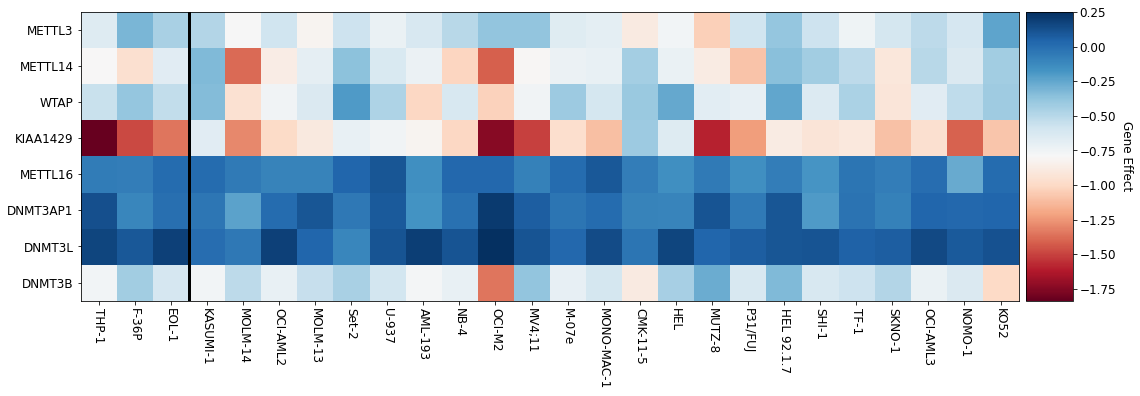

In [ ]:
gene_effect_heatmap(m6A_mt, m6A_wt,m6A_writer_genes + DNMT_genes)

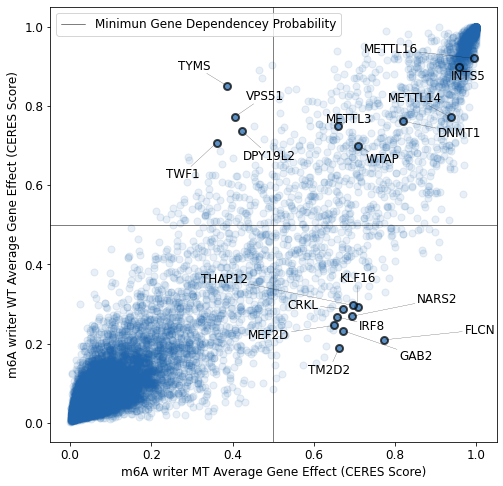

,inputGenes,p_value,fdr,description,term


In [ ]:
m6A_mt_effect, m6A_wt_effect = gene_effect_scatter(
    m6A_mt, m6A_wt,return_effect=True,plot=False
)

labels = intersection (
    m6A_mt_effect[m6A_mt_effect <= 0.45].index.tolist(),m6A_wt_effect[m6A_wt_effect >= 0.7].index.tolist()
) + intersection (m6A_mt_effect[m6A_mt_effect >= 0.65].index.tolist(),m6A_wt_effect[m6A_wt_effect <= 0.3].index.tolist())

gene_effect_scatter(
    m6A_mt, m6A_wt,
    genes=labels + ['DNMT1'] + ['INTS5'] + 
    [g for g in m6A_writer_genes if g in m6A_mt_effect.index.tolist()],
    name_scatter='m6A writer',
    name='DNA-RNA-mtyl-m6A-scatter.pdf'
)

run_enrichment(labels)

### INTS5 or m6A writer mutation

In [ ]:
mt, wt = mt_wt_objs(lu, m6A_writer_genes+['INTS5','TP53'])

#of mutated cell lines:
	30
#of wildtype cell lines:
	67


In [ ]:
# gene_effect_heatmap(DNMT_mt, DNMT_wt,m6A_writer_genes + DNMT_genes)

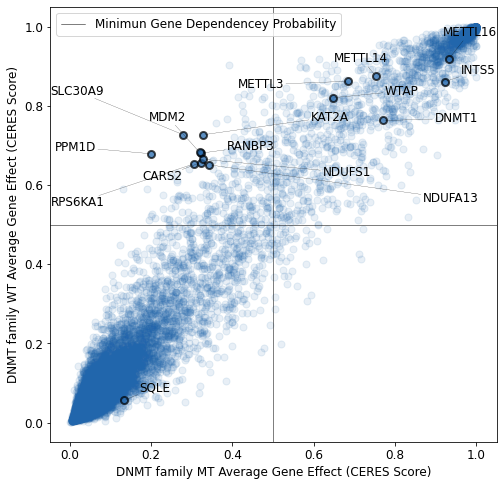

,inputGenes,p_value,fdr,description,term
0,"CARS2,NDUFS1,NDUFA13",0.000043,0.0401,Primary mitochondrial disease,KW-1274


In [ ]:
mt_effect, wt_effect = gene_effect_scatter(
    mt, wt,return_effect=True,plot=False
)

labels = intersection (
    mt_effect[mt_effect < 0.35].index.tolist(),wt_effect[wt_effect > 0.65].index.tolist()
) + intersection (mt_effect[mt_effect > 0.7].index.tolist(),wt_effect[wt_effect < 0.4].index.tolist())

gene_effect_scatter(
    mt, wt,
    genes=labels + ['DNMT1'] + ['INTS5', 'SQLE'] +
    [g for g in m6A_writer_genes if g in mt_effect.index.tolist()],
    name_scatter='DNMT family',
#     name='DNA-RNA-mtyl-DNmt-scatter.pdf'
)

run_enrichment(labels)

### DESeq analysis

In [ ]:
def make_counts_coldata(obj1, obj2, condition, factor1, factor2):

    counts1 = obj1.rnaseq_reads
    coldat1 = pd.Series(counts1.shape[1] * [factor1], index = counts1.columns, name = condition)

    counts2 = obj2.rnaseq_reads
    coldat2 = pd.Series(counts2.shape[1] * [factor2], index = counts2.columns, name = condition)

    #Concatenate Column Data
    coldat = pd.concat([coldat1, coldat2], axis = 0)
    #Concatenate read count data
    counts_mat = pd.concat([counts1, counts2], axis = 1)
    #Sum duplicate indeces
    counts_mat = counts_mat.groupby(counts_mat.index).sum().astype(int)

    return counts_mat, coldat

In [ ]:
counts_mat, coldat = make_counts_coldata(m6A_mt, m6A_wt,'mutation','mt','wt')

In [ ]:
coldat[coldat == 'mt']

ACH-000146    mt
ACH-000487    mt
ACH-000084    mt
ACH-000198    mt
Name: mutation, dtype: object

## CCLE DNA Methylation data

HL-60 raw data - https://trace.ncbi.nlm.nih.gov/Traces/sra/?run=SRR8633931

In [ ]:
depmap_data_path = str(pathlib.Path(can.__file__).resolve().parent.parent)+'/setup/data/depmap'

cgi_CpG_clusters = pd.read_csv(
    f'{depmap_data_path}/CCLE_RRBS_cgi_CpG_clusters_20181119.txt.gz',
    sep='\t', quotechar='"',low_memory=False
)

enh_CpG_clusters = pd.read_csv(
    f'{depmap_data_path}/CCLE_RRBS_enh_CpG_clusters_20181119.txt.gz',
    sep='\t', quotechar='"',low_memory=False
)

tss_CpG_clusters = pd.read_csv(
    f'{depmap_data_path}/CCLE_RRBS_tss_CpG_clusters_20181022.txt.gz',
    sep='\t', quotechar='"',low_memory=False
)

TSS1kb = pd.read_csv(
    f'{depmap_data_path}/CCLE_RRBS_TSS1kb_20181022.txt.gz',
    sep='\t', quotechar='"',low_memory=False
)

In [ ]:
# cgi_CpG_clusters

In [ ]:
# enh_CpG_clusters

In [ ]:
genes = {}

### TSS1kb

In [ ]:
tss1kb_hl60_df = TSS1kb.loc[
    :,['locus_id','CpG_sites_hg19','avg_coverage']+
    [col for col in TSS1kb.columns for aml in [
    'HL60_',#'OCIAML2','OCIAML2','KG1_'
] if aml in col]].dropna()
# .unique()


In [ ]:
data1 = tss1kb_hl60_df.loc[:,['locus_id','HL60_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE']].set_index('locus_id').astype('double')

In [ ]:
genes['tss1kb'],_,_,_ = zip(*
    data1[data1.iloc[:,0] > 0.95].index.str.split('_').tolist()
)
genes['tss1kb'] = set(tss1kb_hl60_genes)

### CpG

In [ ]:
tss_CpG_hl60_df = tss_CpG_clusters.loc[
    :,['cluster_id','CpG_sites_hg19','avg_coverage']+
    [col for col in TSS1kb.columns for aml in [
    'HL60_',#'OCIAML2','OCIAML2','KG1_'
] if aml in col]].dropna()
# .unique()

In [ ]:
data2 = tss_CpG_hl60_df.loc[:,['cluster_id','HL60_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE']].set_index('cluster_id').astype('double')

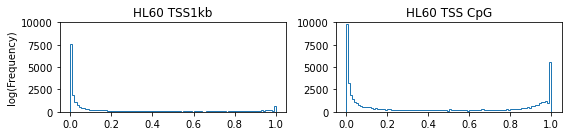

In [ ]:
# Set up the plot
f, (ax1,ax2) = plt.subplots(1,2,figsize=(8,2))

ax1.hist(
    data1, histtype='step', stacked=False, fill=False, bins = 100, 
)
ax1.set_title('HL60 TSS1kb', size = 12)
ax1.set_ylabel('log(Frequency)', size= 10)
ax1.set_ylim(0,10000)

# Set up the plot
ax2 = plt.subplot(1, 2, 2)

ax2.hist(
    data2, histtype='step', stacked=False, fill=False, bins = 100, 
)
ax2.set_title('HL60 TSS CpG', size = 12)
ax2.set_ylim(0,10000)
# Title and labels

# f.set_yscale('log')
plt.tight_layout()
plt.show()

In [ ]:
genes['tss_CpG'] = set([x[0] for x in data[data.iloc[:,0] > 0.95].index.str.split('_').tolist()])

## CCLE metabolomics

    CCLE_metabolomics_20190502.csv


# 

In [405]:
!date

Fri Dec 17 19:26:37 PST 2021
